In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv(r'C:\Users\Deepra Ghosh\Desktop\IBM Data Science\Course 9 Capstone project\Data-Collisions.csv')

C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [4]:
df=data[['SEVERITYCODE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']]
df.rename(columns = {'SEVERITYCODE':'severity type','PERSONCOUNT':'persons','PEDCOUNT':'pedestrians','PEDCYLCOUNT':'cycles','VEHCOUNT':'vehicles'},inplace=True)

C:\ProgramData\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [5]:
df.head()

,severity type,persons,pedestrians,cycles,vehicles
0,2,2,0,0,2
1,1,2,0,0,2
2,1,4,0,0,3
3,1,3,0,0,3
4,2,2,0,0,2


In [6]:
X=df[['persons','pedestrians','cycles','vehicles']].values
X

array([[2, 0, 0, 2],
       [2, 0, 0, 2],
       [4, 0, 0, 3],
       ...,
       [3, 0, 0, 2],
       [2, 0, 1, 1],
       [2, 0, 0, 2]], dtype=int64)

In [7]:
y=df['severity type'].values
y

array([2, 1, 1, ..., 2, 2, 1], dtype=int64)

In [8]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.33020207, -0.18743029, -0.16958841,  0.12553783],
       [-0.33020207, -0.18743029, -0.16958841,  0.12553783],
       [ 1.15576451, -0.18743029, -0.16958841,  1.7102107 ],
       [ 0.41278122, -0.18743029, -0.16958841,  1.7102107 ],
       [-0.33020207, -0.18743029, -0.16958841,  0.12553783]])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 4) (155738,)
Test set: (38935, 4) (38935,)


In [13]:
Ks = 12
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.73345319, 0.74018236, 0.73650957, 0.7413895 , 0.74108129,
       0.75500193, 0.7553615 , 0.75500193, 0.75448825, 0.75482214,
       0.75538718])

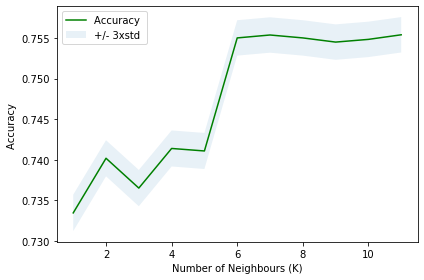

In [18]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.savefig('capstone knn.jpeg')
plt.show()


In [15]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7553871837678181 with k= 11


The accuracy does not increase by a large proportion after k=7. So we take k=7.

In [16]:
k = 7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
yhat[0:5]
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7522313115617255
Test set Accuracy:  0.7553614999357904


Model is working with significantly good accuracy.

In [23]:
print(y_test[1:20])
print(yhat[1:20])

[1 1 2 2 1 2 2 2 1 1 2 1 1 1 1 1 1 2 1]
[1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1]
